# Statistics and Data Science: Organizing and cleaning data

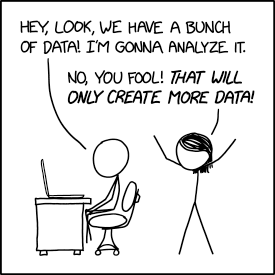
Source: [xqcd 2582](https://xkcd.com/2582/)

## Content

- [Dictionary](#Dictionary)
   - [What is a dictionary?](#dico-def)
   - [Indexing dictionaries](#dico-index)
   - [Dictionary methods, built-in functions and operations](#dico-methods)
      - [Extracting keys and values](#dico-extract)
      - [Iterate over dictionary](#dico-iterate)
      - [Slice and remove elements](#dico-slice)
      - [Get and update one value](#dico-get)
      - [Check if a key belongs to a dictionary](#dico-check)
   - [Merging dictionaries](#dico-merge)
- [Improving your functions: *args and **kwargs](#arg-kwarg)
- [Comprehensions](#Comprehensions)
- [String methods](#string-methods)
   - [Indexing and slicing of strings](#string-index)
   - [Counting](#Counting)
   - [Case conversion](#case-conversion)
   - [Finding substring](#find)
   - [Replacing substring](#replace)
   - [Joining](#Joining)
   - [Formatting](#Formatting)
   - [f-strings](#f-strings)

## Dictionary

### What is a dictionary? <a class="anchor" id="dico-def"></a>

We have so far seen two collection data types: lists and tuples. In both cases, the sequence of data was referenced by the index number. For example, say we have a tuple gathering the degree of morality of Florence, Jordane, and Julia:

In [92]:
degree_morality = (0.3, 0.2, 0.5) 

print(degree_morality[0])
print(degree_morality[1])
print(degree_morality[2])

0.3
0.2
0.5


Instead of individuals "0", "1", "2", we might want to refer to the name of our individuals name, i.e., we would like to do something like `degree_morality['Florence']` instead of `degree_morality[0]`. This is possible by using a **dictionary**. Language dictionaries associate a word to its definition. A dictionary in Python is very similar: it maps a **key**, e.g., `'Florence'` with an associated **value**, e.g., `0.3`. 

We create dictionaries using curly braces `{}`. The syntax is then: `{key_1: value_1, key_2: value_2, ...}`:

In [93]:
dictionary_morality = {
    'Florence': 0.3,     # You do not need to write each entry on separate lines, but it helps clarity
    'Jordane': 0.2,      # Disclaimer: the names and values are fictitious. No identification with actual persons should be inferred.
    'Julia': 0.5}
print(type(dictionary_morality), dictionary_morality)

<class 'dict'> {'Florence': 0.3, 'Jordane': 0.2, 'Julia': 0.5}


Instead of curly braces, we can use the built-in `dict()` function to create dictionaries. One way is to use as argument a tuple of 2-tuples, each one containing a key-value pair: 

In [24]:
dict((('Florence',0.3), ('Jordane', 0.2), ('Julia', 0.5)))    # 1st parenthesis for dict() function, 2nd parenthesis outer tuple

{'Florence': 0.3, 'Jordane': 0.2, 'Julia': 0.5}

Another possibility is to make a dictionary with keyword arguments - kwargs:  

In [26]:
dict(Florence=0.3, Jordane=0.2, Julia=0.5)      # note that you do not need to write strings

{'Florence': 0.3, 'Jordane': 0.2, 'Julia': 0.5}

In this example, we used strings as keys, which is the most common case, but any *immutable* object (e.g., `int`, `float`, `tuple`) can serve as key while the values can be of any type. You can even mix different type of keys and values in the same dictionary: 

In [28]:
{'string key': 0, 34: 87.2, 7.9: 'string value', ('tuple','key'): ['list', 'value']}

{'string key': 0,
 34: 87.2,
 7.9: 'string value',
 ('tuple', 'key'): ['list', 'value']}

However, you cannot use *mutable* object as key:

In [29]:
{'immutable is ok': 1, ['mutable', 'key', 'not', 'ok']: 0}

TypeError: unhashable type: 'list'

In addition, the key shall be **unique**! Reusing the same key twice will overwrite the previous value stored:

In [27]:
{'Florence': 0.3, 'Florence': 0.2}

{'Florence': 0.2}

### Indexing dictionaries <a class="anchor" id="dico-index"></a>

The whole point of creating a dictionary was to extract a value using a key instead of an index number:

In [30]:
dictionary_morality['Julia']

0.5

That's very convenient, isn't it? Even better, since dictionaries are *mutable* objects, we can add new entries to our dictionary:

In [34]:
dictionary_morality['Ale']=0.5
dictionary_morality

{'Florence': 0.3, 'Jordane': 0.2, 'Julia': 0.5, 'Ale': 0.5}

Oups, I made a mistake while entering Ale's degree of morality. Luckily, we can change an entry:  

In [94]:
dictionary_morality['Ale']=0.4
dictionary_morality

{'Florence': 0.3, 'Jordane': 0.2, 'Julia': 0.5, 'Ale': 0.4}

### Dictionary methods, built-in functions and operations <a class="anchor" id="dico-methods"></a>

We have previously seen some methods for lists. Remember that a method is a function that is available for a given object because of the object's type. As everything in Python, dictionaries are objects and thus have built-in methods. Here are these methods:

|Method|Description|
|:-------|:----------|
|`d.clear()` | Removes all the elements from dictionary `d`|
|`d.copy()` | Returns a copy of `d`|
|`d.fromkeys(keys, value)` | Returns a dictionary with the specified keys and value (optional)|
|`d.get(key, default = None)` | Returns the value associated with `key`. The second argument specifies what should be returned if the key is absent|
|`d.items()` | Returns a list containing a tuple for each key value pair|
|`d.keys()` | Returns a list containing the dictionary's keys|
|`d.pop(key)` | Removes the element with the specified `key`|
|`d.popitem()` | Removes the last inserted key-value pair|
|`d.setdefault(key, value)` | Returns the value of the specified `key`. If the key does not exist: insert the key, with the specified `value` (optional)|
|`d.update({key: value})` | Updates `d` with the specified key-value pairs|
|`d.values()` | Returns a list of all the values in `d`|

In addition, you can apply built-in functions to dictionaries such as:

|Function|Description|
|:-------|:----------|
|`len(d)` | Gives the number of entries of the dictionary `d`|
|`list(d)` | Extract a list of the keys of `d`|
|`del d[key]` | Deletes entry `key` from `d`|

Let's try some of these. 

#### Extracting keys and values <a class="anchor" id="dico-extract"></a>

First, let's extract the keys of our dictionary. We can either use the method `d.keys()` or the function `list()`:

In [80]:
dictionary_morality.keys()

dict_keys(['Florence', 'Jordane', 'Julia', 'Ale'])

In [76]:
list(dictionary_morality)

['Florence', 'Jordane', 'Julia', 'Ale']

Notice the difference? `list()`actually returns a `list` but `d.keys()` creates a `dict_keys` object. Such object allows to view keys and iterate over them, but we cannot index it directly. Ok, now let's extract the values of our dictionary:

In [47]:
dictionary_morality.values()

dict_values([0.3, 0.2, 0.5, 0.4])

Similarly than `dict.keys()` returns a `dict_keys` object, `dict.values()` returns a `dict_values` object. In case, as for `tuple`, you can convert your `dict_values` object to a `list` using `list()`:

In [81]:
list(dictionary_morality.values())

[0.3, 0.2, 0.5, 0.4]

If we want both keys and values, we can use `d.items()` 

In [70]:
dictionary_morality.items()

dict_items([('Florence', 0.3), ('Jordane', 0.2), ('Julia', 0.5), ('Ale', 0.4)])

#### Iterate over dictionary <a class="anchor" id="dico-iterate"></a>

Using `items()` is the best way to **iterate over a dictionary**:

In [95]:
for key, value in dictionary_morality.items():
    print(key, ':', value)

Florence : 0.3
Jordane : 0.2
Julia : 0.5
Ale : 0.4


Note that when using `item()` to iterate over values, you actually iterate over copies of them. This implies that if you make changes within the `for`loop, you will not change the entries in the dictionary: 

In [96]:
for key, value in dictionary_morality.items():
    value = 'this string will not be in dictionary.'

dictionary_morality

{'Florence': 0.3, 'Jordane': 0.2, 'Julia': 0.5, 'Ale': 0.4}

You will, however, if you use the keys:

In [97]:
d = dictionary_morality.copy()          # creates copy of our dictionary (to avoid losing our data...)

for key, _ in d.items():
    d[key] = 'this string will be in dictionary.'

print(dictionary_morality)
print(d)

{'Florence': 0.3, 'Jordane': 0.2, 'Julia': 0.5, 'Ale': 0.4}
{'Florence': 'this string will be in dictionary.', 'Jordane': 'this string will be in dictionary.', 'Julia': 'this string will be in dictionary.', 'Ale': 'this string will be in dictionary.'}


#### Slice and remove elements <a class="anchor" id="dico-slice"></a>

The `items()` method is also quite useful to slice a dictionary. For example, say we want to extract the entries for Florence and Jordane. To do so, we can use the `islice()` function of the `itertools` module. We will discuss modules later, but for now you can remember that a module is a file containing a set of functions and that we need to `import` a module if we want to use the functions that it contains. The `itertools` module specifically contains functions creating iterators for efficient looping - check the [documentation](https://docs.python.org/3/library/itertools.html)! 

In [71]:
import itertools

dict(itertools.islice(dictionary_morality.items(), 2))

{'Florence': 0.3, 'Jordane': 0.2}

Slicing allowed us to extract a subset of our dictionary. If we want to remove one element, we can use `d.pop()`. For instance, let's remove Jordane from our dictionary:

In [85]:
dictionary_morality.pop('Jordane')
dictionary_morality

{'Florence': 0.3, 'Julia': 0.5, 'Ale': 0.4}

Good bye Jordane, you will be missed. 

#### Get and update one value <a class="anchor" id="dico-get"></a>

Let's first try `d.get()`:

In [49]:
dictionary_morality.get('Florence')

0.3

Seems like `dictionary_morality.get('Florence')` is the same as `dictionary_morality['Florence']`, and indeed for existing keys, both operations return the value associated with the key. However, what about when the key does not exist? Let's try with our deleted entry `'Jordane'`

In [50]:
dictionary_morality.get('Jordane')

There was no error (there would be if we did `dictionary_morality['Jordane']`), and we got `None`. We can also specify a default value:

In [51]:
dictionary_morality.get('Jordane', 0.2)

0.2

Note that it did not add Jordane to our dictionary. If we wish to do so, we could use `d.setdefault()`

In [53]:
print(dictionary_morality)

dictionary_morality.setdefault('Jordane', 0.2)
print(dictionary_morality)

{'Florence': 0.3, 'Julia': 0.5, 'Ale': 0.4}
{'Florence': 0.3, 'Julia': 0.5, 'Ale': 0.4, 'Jordane': 0.2}


Note that `d.setdefault()` also allows to get the value associated with a key.

In [54]:
dictionary_morality.setdefault('Jordane')

0.2

Hence, you should think about what behavior you want when you attempt to get a value out of a dictionary by key. Do you want an error when the key is missing? Then use indexing. Do you want to have a (possibly `None`) default if the key is missing and no error? Then use `get()`. Or do you want to create a new entry entry to your dictionary when the key is missing? Then use `setdefault()`.

Note that if the key already exists, `setdefault()` does not modify its value:

In [55]:
dictionary_morality.setdefault('Jordane', 0.3)
dictionary_morality

{'Florence': 0.3, 'Julia': 0.5, 'Ale': 0.4, 'Jordane': 0.2}

Instead you can update values - or add a new entry - with `d.update()`. Notice the syntax, the argument should be a dictionary (or an iterable object with key value pairs). That being said, I recommend using indexing: it is simpler, and apparently faster than `update()` 

In [86]:
dictionary_morality.update({'Jordane': 0.25})   # Add Jordane to dictionary
print(dictionary_morality)

dictionary_morality.popitem()                   # Removed the last inserted key-value pair: bye-bye again Jordane
print(dictionary_morality)

dictionary_morality['Jordane']=0.25             # Add Jordane to dictionary
print(dictionary_morality)

{'Florence': 0.3, 'Julia': 0.5, 'Ale': 0.4, 'Jordane': 0.25}
{'Florence': 0.3, 'Julia': 0.5, 'Ale': 0.4}
{'Florence': 0.3, 'Julia': 0.5, 'Ale': 0.4, 'Jordane': 0.25}


#### Check if a key belongs to a dictionary <a class="anchor" id="dico-check"></a>

To know if a key is in an dictionary, we can use the `in` and `not in` operators:

In [87]:
'Ale' in dictionary_morality

True

In [88]:
'Edoardo' in dictionary_morality

False

In [90]:
'Quentin' not in dictionary_morality

True

### Merging dictionaries <a class="anchor" id="dico-merge"></a>

Suppose we want to merge two dictionaries together. Remember how we merged two lists? Or two strings? That's right, we use the `+`operator. Let's try the same with dictionary:

In [99]:
dico_moral_1 = {'Florence': 0.3, 'Julia': 0.5} 
dico_moral_2 = {'Ale': 0.4, 'Jordane': 0.25}

dico_moral_1 + dico_moral_2

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

Ouch, it does not work for dictionaries. Fortunately, there is a simple way to merge dictionaries using the `dict()` function and the `**` operator:

In [100]:
dict(**dico_moral_1, **dico_moral_2)

{'Florence': 0.3, 'Julia': 0.5, 'Ale': 0.4, 'Jordane': 0.25}

Alternatively, using curly braces:

In [110]:
{**dico_moral_1, **dico_moral_2}

{'Florence': 0.3, 'Julia': 0.5, 'Ale': 0.4, 'Jordane': 0.25}

Let's pause a minute and discuss the `**` operator. Do you remember in our previous lecture, we used the unpacking operator `*` to split a tuple inside a function? Here is an example:

In [106]:
print((1,2,3))
print(*(1,2,3))

(1, 2, 3)
1 2 3


Note that the `*` operator works on any kind of iterable. For example, strings or lists:

In [109]:
print(*'123')
print(*[1,2,3])

1 2 3
1 2 3


However, if we apply `*` on a dictionary, we would only unpack the keys:

In [113]:
print(*dico_moral_1)
print({*dico_moral_1, *dico_moral_2})

Florence Julia
{'Florence', 'Ale', 'Julia', 'Jordane'}


Hence, we need to get to the next level. That's the `**` operator. It is also an unpacking operator, but for dictionaries!

## Improving your function: *args and **kwargs <a class="anchor" id="arg-kwarg"></a>

We have discussed above the unpacking operators `*` and `**`. These operators are also very useful when you want to define a function with a variable number of arguments. 

Let's take a example. Suppose we want to sum some integers. The first way would be to use a list (or tuple as argument): 

In [129]:
def my_sum(list_int):
    """This function sums integers. The argument should be a list/tuple of integers."""
    result = 0
    for i in list_int:
        result += i
    return result

print(my_sum([1, 2, 3]))

6


Alternatively, we might want to directly use the integers as arguments. But then the number of arguments could vary... No problem, we can use `*args` to define a function with an arbitrary number of arguments:

In [130]:
def my_sum(*args):
    """This function sums integers. The argument should be a integers."""
    result = 0
    # Iterating over the Python args tuple
    for i in args:
        result += i
    return result

print(my_sum(1, 2, 3))
print(my_sum(1, 2, 3, 4))

6
10


Note that `args` is just a name, i.e., you do not need to use `*args`, all that matters is the **unpacking operator** `*`. 

Ok, now that we understood `*args`, what about `**kwargs`? Does `kwargs` ring a bell? Yes, we have already seen it when we learned how to define functions. More precisely, we have used **named keyword argument** to define the default values of our parameters: 

In [132]:
def cobb_douglas_kwarg(l, k, A=1.01, alpha = 0.75):
    """This function computes the Cobb Douglas production function from labor and capital."""
    return A* l**alpha * k**(1-alpha)

cobb_douglas_kwarg(42, 57, alpha = 0.71)

46.348115238492475

We could omit named keyword argument or modify their value. 

So, what about `**kwargs`? Well it allows to define function with **arbitrary keyword argument**. Let's see an example. Suppose we want to define a function printing the names of individuals for which we have data:  

In [157]:
def sample_names(**kwargs):
    result = 'Our sample includes: '
    # Iterating over the keys of the Python kwargs dictionary
    for key, val in kwargs.items():
        result += key + ' '
    return result

print(sample_names(Florence=0.3, Jordane=0.25, Julia = 0.5, Ale = 0.4))

Our sample includes: Florence Jordane Julia Ale 


Note that you can define functions that combines standard argument, `*args` arguments, and `**kwargs` arguments. However, the order of parameters matter:
1. Standard arguments
2. `*args` arguments
3. `**kwargs` arguments

## Comprehensions



We have previously built lists and tuples, and dictionaries by constructing them directly. What if we want to create a new list based on the values of an existing list? As always, we will take a simple example. Suppose we already defined the list `[1,2,3]` and we would like the list `[3,6,9]`. Unfortunately, multiplying by three using the `*` operator would not do the trick. Remember that the `*` operator on lists actually replicates and concatenates a list. We could write a for loop:

In [166]:
my_lis = [1,2,3]
new_lis = []

for i in my_lis:
    new_lis.append(3*i)
    
new_lis

[3, 6, 9]

Ok, it is working, but it feels quite a lot of coding for a very simple operation! Well, luckily for us, **comprehension** allows to do the same as above, but in one line of code:

In [167]:
[3*i for i in [1,2,3]]

[3, 6, 9]

We can even add a conditional test inside. For example, say we only want the odd numbers:

In [169]:
[3*i for i in [1,2,3] if 3*i %2 !=0]

[3, 9]

More generally, the structure of list comprehension is: 
```python
newlist =[expression_to_put_in_list for item in iterable if condition_1== True]
```

The condition acts as a filter that only selects the items that valuate to `True`.

Ok, let's look at a more complex example, taken from the great course of Justin Bois [Introduction to Programming in the Biological Sciences Bootcamp](http://justinbois.github.io/bootcamp/2022_epfl/index.html). We want to build a list containing the information about the 2018 Nobel laureates. We have, in three separate arrays, their names, nationalities, and category for the prize.

In [159]:
names = (
    "Frances Arnold",
    "George Smith",
    "Gregory Winter",
    "postponed",
    "Denis Mukwege",
    "Nadia Murad",
    "Arthur Ashkin",
    "Gérard Mourou",
    "Donna Strickland",
    "James Allison",
    "Tasuku Honjo",
    "William Nordhaus",
    "Paul Romer",
)

nationalities = (
    "USA",
    "USA",
    "UK",
    "---",
    "DRC",
    "Iraq",
    "USA",
    "France",
    "Canada",
    "USA",
    "Japan",
    "USA",
    "USA",
)

categories = (
    "Chemistry",
    "Chemistry",
    "Chemistry",
    "Literature",
    "Peace",
    "Peace",
    "Physics",
    "Physics",
    "Physics",
    "Physiology or Medicine",
    "Physiology or Medicine",
    "Economics",
    "Economics",
)

Remember the `zip()` function: it allows to iterate over several iterables at the same time:

In [160]:
[(cat, name, nat) for name, nat, cat in zip(names, nationalities, categories)]

[('Chemistry', 'Frances Arnold', 'USA'),
 ('Chemistry', 'George Smith', 'USA'),
 ('Chemistry', 'Gregory Winter', 'UK'),
 ('Literature', 'postponed', '---'),
 ('Peace', 'Denis Mukwege', 'DRC'),
 ('Peace', 'Nadia Murad', 'Iraq'),
 ('Physics', 'Arthur Ashkin', 'USA'),
 ('Physics', 'Gérard Mourou', 'France'),
 ('Physics', 'Donna Strickland', 'Canada'),
 ('Physiology or Medicine', 'James Allison', 'USA'),
 ('Physiology or Medicine', 'Tasuku Honjo', 'Japan'),
 ('Economics', 'William Nordhaus', 'USA'),
 ('Economics', 'Paul Romer', 'USA')]

What if we are only interested in Economics winners? We can add an `if` statement:

In [161]:
[
    (cat, name, nat)
    for name, nat, cat in zip(names, nationalities, categories)
    if cat == "Economics"
]

[('Economics', 'William Nordhaus', 'USA'), ('Economics', 'Paul Romer', 'USA')]

Pretty cool, no? In case, [William Nordhaus](https://en.wikipedia.org/wiki/William_Nordhaus) received the prize for integrating climate change into macroeconomic models, being a pioneer in the design of Integrated Assessment Models. 

## String methods <a class="anchor" id="string-methods"></a> 

Oftentimes, we will work with text data, and not only to perform Text Analytics. For example, imagine you have the following table:

|Name|City | Gender|Yearly Electricity consumption $(kWh)$|Green premium ($CHF/kWh$)|Green electricity mix|
|:-------|:----------|:----------|:----------|:----------|:----------|
|Valjean| Lausanne | M | 3600 | 1.00 | No |
|Javert | Geneva | M | 5400 | 0.10 | Yes |
|Fantine | Bern | F | NA | 0.30 | No |
|Cosette | Zurich | F | 7200 | 0.75 | Yes |

The table contains, for several individuals, their name, city of residence, gender, yearly electricity consumption, green premium (i.e., how much they are willing to pay to get electricity produced by renewable energy), and whether or not they already subscribe to the option to get green electricity. By the way, in Switzerland, the default option is the green electricity mix, so except if you are asking to unsubscribe, you would get electricity produced by renewable (generally, hydropower). You can also ask to get a more expensive electricity mix, made of local renewable energy, such as photovoltaics and wind turbines.

Back to our table. We notice that the table is mixing text and numbers. Several variables in a text format might be useful for our analysis and should be converted to numbers. For instance, we might want to express the variable "Green electricity mix" as: 1 if the individual subscribed ('Yes'), 0 if not ('No').

In addition, we notice that even when the data format is number, we could have some text: the Electricity consumption of Fantine is 'NA', i.e., 'Not Available'. We could discard the observation from Fantine from the analysis - that's probably what you should do in this case. But for the sake of the argument, we could also infer a value and thus replace 'NA' by a number, for instance, taking the mean of the sample, replacing by the closest observation, or even generating a random number. As a good practice, **you should always document all the modifications you are doing to the original data, detailing your assumptions and methods used**.

So, the point is, we will often need to manipulate text data, i.e., strings in Python. As was the case for lists and dictionaries, there exists many string methods. Here are some of the common ones:

|Method|Description|
|:-------|:----------|
|`s.capitalize()` | Converts the first character to upper case|
|`s.casefold()` | Converts string into lower case |
|`s.count(value)` | Returns the number of times a specified value occurs in a string|
|`s.endswith()` |Returns true if the string ends with the specified value|
|`s.find(value)` | Searches the string for a specified value and returns the position of where it was found|
|`s.format()` | Formats specified values in a string|
|`s.index(value)` | Searches the string for a specified value and returns the position of where it was found|
|`s.isalnum()` | Returns True if all characters in the string are alphanumeric|
|`s.isalpha` | Returns True if all characters in the string are in the alphabet|
|`s.isdigit()` | Returns True if all characters in the string are digits|
|`s.islower()`|Returns True if all characters in the string are lower case|
|`s.isnumeric()` | Returns True if all characters in the string are numeric|
|`s.isupper()`|Returns True if all characters in the string are upper case|
|`s.join()`|Converts the elements of an iterable into a string|
|`s.lower()`|Converts a string into lower case|
|`s.maketrans()`|Returns a translation table to be used in translations|
|`s.replace(old_value, new_value)`|Returns a string where a specified value is replaced with a specified value |
|`s.rfind(value)`|Searches the string for a specified value and returns the last position of where it was found |
|`s.rindex(value)`|Searches the string for a specified value and returns the last position of where it was found |
|`s.rsplit(separator)`|Splits the string at the specified separator, and returns a list |
|`s.split(separator)`|Splits the string at the specified separator, and returns a list |
|`s.splitlines()`|Splits the string at line breaks and returns a list |
|`s.startswith(value)`|Returns true if the string starts with the specified value |
|`s.swapcase()`|Swaps cases, lower case becomes upper case and vice versa |
|`s.title()`|Converts the first character of each word to upper case|
|`s.translate()`|Returns a translated string using a dictionary or mapping table|
|`s.upper()`|Converts a string into upper case|

We will explore some of these string processing tools below. You can find a complete list of string methods from the [Python documentation](https://docs.python.org/3/library/stdtypes.html#string-methods). 



### Indexing and slicing of strings <a class="anchor" id="string-index"></a> 

As previously mentioned, strings are sequences of characters, in the same vein as lists and tuples are sequence of elements. Hence, indexing and slicing works the same as it does for lists and tuples! Similarly, built-in functions such as `len()` also applies to strings!

In [175]:
my_str = 'The Green Premium is the additional cost of choosing a clean technology over one that emits a greater amount of greenhouse gases.'

print(len(my_str))
print(my_str[97])
print(my_str[:18])
print(my_str[::-1])

129
a
The Green Premium 
.sesag esuohneerg fo tnuoma retaerg a stime taht eno revo ygolonhcet naelc a gnisoohc fo tsoc lanoitidda eht si muimerP neerG ehT


### Counting

We can use `count()` to calculate the number of occurrences of a character:

In [183]:
my_str.count('a')

9


The method also allows to calculate the number of times a substring appears in a string:

In [185]:
my_str.count('ee')

2

However, substrings cannot overlap. For instance, suppose we have 6 times the character 'A', then `count('AA')` will only return 3:

In [187]:
'AAAAAA'.count('AA')

3

In addition, `count()` and other similar methods are case-sensitive:

In [188]:
'AAaaa'.count('A')

2

### Case conversion <a class="anchor" id="case-conversion"></a> 

To avoid the issue of case-sensitiveness, you can convert all characters of your string to lower cases:

In [189]:
my_str.lower()

'the green premium is the additional cost of choosing a clean technology over one that emits a greater amount of greenhouse gases.'

Alternatively, to upper cases:

In [190]:
my_str.upper()

'THE GREEN PREMIUM IS THE ADDITIONAL COST OF CHOOSING A CLEAN TECHNOLOGY OVER ONE THAT EMITS A GREATER AMOUNT OF GREENHOUSE GASES.'

Note that `lower()` and `upper()` did not modify our original string:

In [192]:
my_str

'The Green Premium is the additional cost of choosing a clean technology over one that emits a greater amount of greenhouse gases.'

Can you guess why? It's because `string` is immutable. It's very convenient to avoid bad manipulations. But if you want to operate on a modified string, you need to store your modified string into a variable:

In [205]:
my_str_low = my_str.lower()
my_str_low

'the green premium is the additional cost of choosing a clean technology over one that emits a greater amount of greenhouse gases.'

### Finding substring  <a class="anchor" id="find"></a> 

First, let's check if the word `'technology'` belongs to our `string`. We use the `in` operator:

In [206]:
'technology' in my_str_low

True

We got `True`, so indeed the sequence of characters forming the word 'technology' does appear in our string. Let's find where! The `find()` methods gives the index where the substring *first* appears:

In [207]:
my_str_low.find('technology')

61

What if a substring is not in the string?

In [208]:
my_str_low.find('choice')

-1

We got `-1`. Beware! It is not the index `-1`! `find()` will always returns positive indices if it finds a substrings, and will return `-1` otherwise.

Now what happens if a substring appears several times? As mentioned above, `find()` will return the index where the substring *first* appears. If we want the last instance, we can use `rfind()` (i.e., right find): 

In [210]:
print(my_str_low.find('the'))
print(my_str_low.rfind('the'))

0
21


When the substring appears only once, `find()` and `rfind()` return the same index:

In [238]:
print(my_str_low.find('technology'))
print(my_str_low.rfind('technology'))

61
61


### Replacing substring <a class="anchor" id="replace"></a> 

Here is a very convenient method: `replace()` will replace a substring by another. For instance, say we want to replace `'additional'` by `'extra'`:

In [211]:
my_str_low.replace('additional', 'extra')

'the green premium is the extra cost of choosing a clean technology over one that emits a greater amount of greenhouse gases.'

But remember, `string` is immutable, so we actually did not change our original string!

In [212]:
my_str_low

'the green premium is the additional cost of choosing a clean technology over one that emits a greater amount of greenhouse gases.'

`replace()` converts all the substring of a string (and not only the first one)

In [245]:
my_str_low.replace('the','')

' green premium is  additional cost of choosing a clean technology over one that emits a greater amount of greenhouse gases.'

`replace()` will thus come in handy to replace missing/error values in our data, remove punctuation, or, for instance, convert Yes/No statements into 1 and 0 values.

### Joining

The `join()` method allows to concatenate the elements of a iterable (e.g., a list or a tuple) into one string:

In [213]:
word_tuple = ('circular', 'economy', 'premium')

' '.join(word_tuple)

'circular economy premium'

Note the syntax: the string before the dot `' '.` specifies what goes between the element of the iterable in the string, e.g., here, a space. But you are free to specify the seperator you wish:

In [214]:
' ... '.join(word_tuple)

'circular ... economy ... premium'

By the way, if you are wondering what is the circular economy premium, just ask Edoardo, we are working on the topic with E4S :) 

### Formatting

Remember when we wanted to combine strings and we used the operator `+`? Well, there is another much more powerful way using the `format()` method. Here is how it looks:

In [254]:
obs_description = ''' 
Our last observation is {name}. 
She lives in {city}.'''.format(name = 'Cosette', city = 'Zurich')

print(obs_description)

 
Our last observation is Cosette. 
She lives in Zurich.


See what happened? We applied the `format()` method to our string. As arguments, the `format()` method is using named keyword arguments (kwargs), here `name = 'Cosette'` and `city = 'Zurich'`. Withing the string, the kwargs are given in curly braces. The `format()` method inserts the strings as the place delimited by braces.

That's nice, isn't it? But can we reach the next level and combine strings and numbers into a string, without relying on the function `str()`? Yes, we can! By using, **string conversion**, we can specify how a number should be represented in a string. The table below shows some of the most common conversion. A complete list is available in the [Python documentation](https://docs.python.org/3/library/stdtypes.html#printf-style-bytes-formatting).

|conversion|description|
|:----------:|-----------|
|`d`| integer|
|`04d`| integer with four digits, possibly with leading zeros|
|`f`| float, default to six digits after decimal|
|`.8f`| float with 8 digits after the decimal|
|`e`| scientific notation, default to six digits after decimal|
|`.16e`| scientific notation with 16 digits after the decimal|
|`s`| display as a string|

Let's try with some examples:

In [228]:
print('Her electricity consumption is {n:d} kWh per year.'.format(n=7200))
print('She is willing to pay an extra {c:f} swiss francs per kWh to get green electricity.'.format(c=0.75))
print('She is willing to pay an extra {c:.3f} swiss francs per kWh to get green electricity.'.format(c=0.75))
print('She is willing to pay an extra {c:.2e} swiss francs per kWh to get green electricity.'.format(c=0.75))
print('She answered {answer:s} to the question of whether she already subscribed to the Green Electricity Mix.'.format(answer='Yes'))

Her electricity consumption is 7200 kWh per year.
She is willing to pay an extra 0.750000 swiss francs per kWh to get green electricity.
She is willing to pay an extra 0.750 swiss francs per kWh to get green electricity.
She is willing to pay an extra 7.50e-01 swiss francs per kWh to get green electricity.
She answered Yes to the question of whether she already subscribed to the Green Electricity Mix.


Do you understand the syntax? It is the same as for strings: kwargs as arguments of the `format()` method and kwargs inside braces in the string. However, now we also specify the conversion, i.e., how the kwarg should appear in the string. We do so by including in the braces after our kwarg a colon `:` followed by the string conversion code. For instance, for the first string, we have inside the braces `{n:d}`: `n` is our kwarg, and `d`is the string conversion for integer. Similarly in the second string, except this time we are using `f` to specify we convert a float. Note that by default, a float will appear with six digits after decimal. If we want to adjust the number of decimal, we can: in the third string we have `.3f`, meaning we only want three decimals. 
Quite neat, isn't it? Then, wait, it gets even better!

### f-strings

There is an even faster and more efficient way than the `format()` method! **f-strings** allow to directly insert some variables into strings. Even better, the syntax is quite simple: we prefix our string with `f` or `F`, and then add the name of the variable we want to insert between braces. We don't even need to specify the conversion, except if we want to adjust the default setting - for example, modify the number of decimals displayed for floats. In that case, we are using the same conversion code as for the `format()` method. Here are some illustrations:

In [236]:
name = 'Cosette'
city = 'Zurich'
consumption = 7200
wtp = 0.75

print(f'Our last observation is {name}.')
print(f'She lives in {city}.')
print(f'Her electricity consumption is {consumption} kWh per year.')
print(f'She is willing to pay an extra {wtp:.3f} swiss francs per kWh to get green electricity.')

Our last observation is Cosette.
She lives in Zurich.
Her electricity consumption is 7200 kWh per year.
She is willing to pay an extra 0.750 swiss francs per kWh to get green electricity.


## Computing Environment <a class="anchor" id="computing-environment"></a>

In [249]:
%load_ext watermark
%watermark -v -p jupyterlab

Python implementation: CPython
Python version       : 3.9.4
IPython version      : 7.22.0

jupyterlab: 3.0.14

